# Q3

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio.

Consider this "piecewise-linear" extension of the market model:

Here Xi is the excess return on an industry portfolio, while Xm is the excess return on the market portfolio. Then 1− is an "indicator variable” that has value of one when the excess market return is negative, and zero otherwise ⇒ beta coefficient of ( β + β* ) for "bear" market.

Using monthly excess returns for the five industry portfolios and the market portfolio:

Calculate and report the risk premiums for the five industry portfolios and the market portfolio.

Calculate and report the intercept coefficient and the (two) slope coefficients for each of the five industry portfolios, when estimated using the piecewise-linear market model.

Create a bar chart showing the intercept coefficient for the five industry portfolios.

Briefly explain (in words) the economic interpretation for the intercept coefficient when the piecewise-linear market model is applied to an actively-managed mutual fund.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
Industry_Portfolio=pd.read_excel("Exam-Industry.xlsx",index_col=0)
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92
190102,2.89,4.87,3.45,3.33,2.63
190103,1.89,1.81,-0.83,2.29,-0.86
190104,4.36,2.58,3.16,6.37,1.11
190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59
190609,-3.28,-2.84,-6.16,-6.01,-2.26
190610,8.63,6.01,6.74,2.25,7.25


In [3]:
Market_Portfolio=pd.read_excel("Exam–Market.xlsx",index_col=0)
Market_Portfolio

,Market
Date,
190101,1.99
190102,3.49
190103,0.46
190104,2.90
190105,-1.27
...,...
190608,2.91
190609,-4.37
190610,6.65


In [4]:
# Merge the excess return dataframe and the Market_Portfolio together

Merged_Portfolio = Industry_Portfolio.merge(Market_Portfolio,how='inner',left_index=True, right_index=True)
Merged_Portfolio 

,Cnsmr,Manuf,HiTec,Hlth,Other,Market
Date,,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92,1.99
190102,2.89,4.87,3.45,3.33,2.63,3.49
190103,1.89,1.81,-0.83,2.29,-0.86,0.46
190104,4.36,2.58,3.16,6.37,1.11,2.90
190105,0.92,-2.55,-1.13,1.96,-2.40,-1.27
...,...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59,2.91
190609,-3.28,-2.84,-6.16,-6.01,-2.26,-4.37
190610,8.63,6.01,6.74,2.25,7.25,6.65


The risk premiums for the five industry portfolios and the market portfolio are found in the cell below

In [5]:
Summary = pd.DataFrame({"Mean":Merged_Portfolio .mean()})
Summary

,Mean
Cnsmr,1.449167
Manuf,1.108889
HiTec,1.672361
Hlth,1.452083
Other,1.366389
Market,1.395139


In [6]:
Merged_Portfolio["Rm-Rf_star"] = np.where(Merged_Portfolio["Market"]<0, 1, 0)

In [7]:
Merged_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other,Market,Rm-Rf_star
Date,,,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92,1.99,0
190102,2.89,4.87,3.45,3.33,2.63,3.49,0
190103,1.89,1.81,-0.83,2.29,-0.86,0.46,0
190104,4.36,2.58,3.16,6.37,1.11,2.90,0
190105,0.92,-2.55,-1.13,1.96,-2.40,-1.27,1
...,...,...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59,2.91,0
190609,-3.28,-2.84,-6.16,-6.01,-2.26,-4.37,1
190610,8.63,6.01,6.74,2.25,7.25,6.65,0


In [8]:
# Initialize the Market_downside_model DataFrame with appropriate indices and columns
Market_downside_model=pd.DataFrame(index=["Jensen Alpha","beta","beta_star"],
                          columns=Industry_Portfolio.columns)

# Loop through the first 10 columns of Merged_Portfolio (industry portfolios)
for column in range(Market_downside_model.shape[1]):
    y = Merged_Portfolio.iloc[:, column]                          # Dependent variable (industry portfolio excess return)
    x = Merged_Portfolio[["Market", "Rm-Rf_star"]]                # Independent variables (Market excess return) # Check that it is "Rm-Rf"
    
    # Add a constant (intercept term) to the independent variables
    x = sm.add_constant(x)
    
    # Perform linear regression
    model = sm.OLS(y, x).fit()

    # Store the regression results in the Market_model DataFrame
    Market_downside_model.iloc[0, column] = model.params['const']  # Intercept
    Market_downside_model.iloc[1, column] = model.params['Market']  # Market (Rm-Rf)
    Market_downside_model.iloc[2, column] = model.params['Rm-Rf_star']  # Market (Rm-Rf)

The intercept coefficient and the (two) slope coefficients for each of the five industry portfolios can be found below

In [9]:
Market_downside_model

,Cnsmr,Manuf,HiTec,Hlth,Other
Jensen Alpha,-0.183135,-0.50006,0.492487,0.576139,0.052349
beta,0.927842,1.080802,0.963089,0.718671,1.077742
beta_star,1.28021,0.383041,-0.620597,-0.480136,-0.718331


In [10]:
Market_downside_model = Market_downside_model.T

<Axes: title={'center': 'Intercept'}>

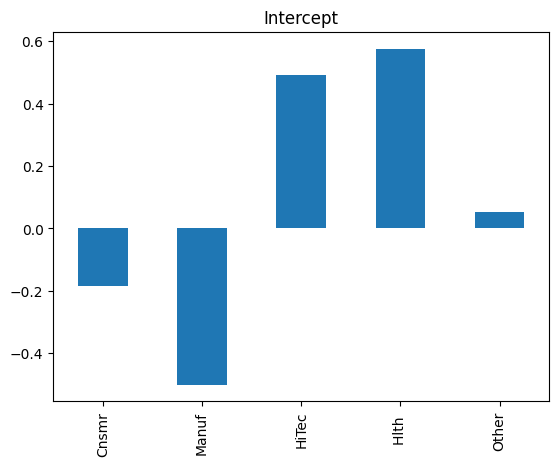

In [13]:
Market_downside_model["Jensen Alpha"].plot(kind="bar", title="Intercept")

For an actively-managed mutual fund, the intercept (often referred to as Jensen's Alpha) represents the excess return of the fund that is not explained by market timing. A positive intercept indicates the fund manager's ability to generate returns beyond what would be expected given his ability to time the market. 